In [51]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
application_record = pd.read_csv('/content/drive/MyDrive/STUDY/DS/Internships/CodeAlpha_ML-3M/Task-5 (Credit Scoring Model)/application_record.csv', index_col=0)
application_record

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0


In [54]:
credit_record = pd.read_csv('/content/drive/MyDrive/STUDY/DS/Internships/CodeAlpha_ML-3M/Task-5 (Credit Scoring Model)/credit_record.csv')
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


## **Data Cleaning**

In [55]:
# Pivoting the original DataFrame to get STATUS counts as columns
pivoted_df = credit_record.pivot_table(index='ID', columns='STATUS', aggfunc='size', fill_value=0).reset_index()
pivoted_df

STATUS,ID,0,1,2,3,4,5,C,X
0,5001711,3,0,0,0,0,0,0,1
1,5001712,10,0,0,0,0,0,9,0
2,5001713,0,0,0,0,0,0,0,22
3,5001714,0,0,0,0,0,0,0,15
4,5001715,0,0,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...
45980,5150482,12,0,0,0,0,0,6,0
45981,5150483,0,0,0,0,0,0,0,18
45982,5150484,12,0,0,0,0,0,1,0
45983,5150485,2,0,0,0,0,0,0,0


In [56]:
# Conducting InnerJoin between the Application Record and Newly created Pivot Table
merged_df = pd.merge(application_record, pivoted_df, how="inner", on="ID")
merged_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,0,1,2,3,4,5,C,X
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,NaN,2.0,1,1,0,0,0,0,13,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,NaN,2.0,1,1,0,0,0,0,12,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2.0,7,0,0,0,0,0,7,16
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,2,0,0,0,0,0,0,3
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1.0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,Managers,2.0,0,0,0,0,1,3,0,8
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,Medicine staff,2.0,1,7,2,1,1,7,5,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,Medicine staff,2.0,1,7,2,1,1,7,14,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,Sales staff,2.0,8,1,1,0,0,0,0,0


In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [58]:
# Converting column types to Int 64/Integer
columns = merged_df.iloc[:, 17:].columns
merged_df[columns] = merged_df[columns].astype('Int64')

In [59]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

### **Statstical Description of Numerical Features**

In [61]:
merged_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,0,1,2,3,4,5,C,X
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.0,36457.000000,36457.000000,36457.000000,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0
mean,5.078227e+06,0.430315,1.866857e+05,-15975.173382,59262.935568,1.0,0.225526,0.294813,0.089722,2.198453,7.972516,0.239926,0.021971,0.007845,0.00587,0.041885,9.039032,4.003346
std,4.187524e+04,0.742367,1.017892e+05,4200.549944,137651.334859,0.0,0.417934,0.455965,0.285787,0.911686,7.748513,0.947265,0.209588,0.100982,0.093212,0.895565,13.026453,8.667466
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.042028e+06,0.000000,1.215000e+05,-19438.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5.074614e+06,0.000000,1.575000e+05,-15563.000000,-1552.000000,1.0,0.000000,0.000000,0.000000,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,5.115396e+06,1.000000,2.250000e+05,-12462.000000,-408.000000,1.0,0.000000,1.000000,0.000000,3.0,11.0,0.0,0.0,0.0,0.0,0.0,15.0,3.0
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.0,60.0,27.0,8.0,4.0,7.0,48.0,59.0,61.0


In [62]:
merged_df['DAYS_EMPLOYED'].sort_values(ascending = False).unique()

array([365243,    -17,    -43, ..., -15227, -15661, -15713])

* In this dataset, the days_employed values are negative, with the exception of the positive value (365243), which indicates unemployment. To simplify comprehension, all values have been converted to positive, where 0 now signifies unemployment. This conversion has also been applied to the days_birth variable for consistency.

In [63]:
# Positive values
merged_df['DAYS_EMPLOYED'] = merged_df['DAYS_EMPLOYED'].apply(lambda x : 0 if x > 0 else -x)
merged_df['DAYS_BIRTH'] = merged_df['DAYS_BIRTH'] * -1

# Renaming columns
merged_df.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Property','CNT_CHILDREN':'Children','AMT_INCOME_TOTAL':'Income',
'NAME_INCOME_TYPE':'Income status', 'NAME_EDUCATION_TYPE':'Education','NAME_FAMILY_STATUS':'Marital', 'NAME_HOUSING_TYPE':'Housing', 'DAYS_BIRTH': 'Day since birth',
'DAYS_EMPLOYED' : 'Days employed', 'FLAG_MOBIL' : 'Mobile', 'FLAG_WORK_PHONE':'Work phone', 'FLAG_PHONE':'Phone', 'FLAG_EMAIL':'Email', 'OCCUPATION_TYPE':'Job',
'CNT_FAM_MEMBERS':'Family'},inplace=True)

In [64]:
merged_df.head()

,ID,Gender,Car,Property,Children,Income,Income status,Education,Marital,Housing,...,Job,Family,0,1,2,3,4,5,C,X
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,NaN,2,1,1,0,0,0,0,13,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,NaN,2,1,1,0,0,0,0,12,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Security staff,2,7,0,0,0,0,0,7,16
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,2,0,0,0,0,0,0,3
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Sales staff,1,0,0,0,0,0,0,0,5


In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               36457 non-null  int64  
 1   Gender           36457 non-null  object 
 2   Car              36457 non-null  object 
 3   Property         36457 non-null  object 
 4   Children         36457 non-null  int64  
 5   Income           36457 non-null  float64
 6   Income status    36457 non-null  object 
 7   Education        36457 non-null  object 
 8   Marital          36457 non-null  object 
 9   Housing          36457 non-null  object 
 10  Day since birth  36457 non-null  int64  
 11  Days employed    36457 non-null  int64  
 12  Mobile           36457 non-null  int64  
 13  Work phone       36457 non-null  int64  
 14  Phone            36457 non-null  int64  
 15  Email            36457 non-null  int64  
 16  Job              25134 non-null  object 
 17  Family      

In [66]:
merged_df.Mobile.unique()

array([1])

* We can remove the ID and mobile columns because the mobile column has only one value, which is unnecessary repetition. Similarly, the ID isn't needed for our purpose.



In [67]:
merged_df = merged_df.drop(['ID', 'Mobile'], axis = 1)

## **EDA**

* Instead of directly analyzing the overdue status, we might prefer to pinpoint clients with a high likelihood of bad debt. We could categorize those with only status 0 in their history as having a low chance of bad debt since these overdues are quite common. Anyone with a status of 1 or higher in their credit history can be classified as having a high chance.

In [68]:
import math
# Summing the column from 1 to 5
merged_df['Bad debt chance'] = merged_df.iloc[:,17:-2].sum(axis=1, min_count=1)
# Low if the sum is 0, else high
merged_df['Bad debt chance'] = merged_df['Bad debt chance'].apply(lambda x: 'low' if (x == 0) else 'high')
merged_df['Bad debt chance'].value_counts()

Bad debt chance
low     32166
high     4291
Name: count, dtype: int64

In [69]:
# Drop the status columns since we summarized it with bad debt chance
merged_df = merged_df.drop(merged_df.iloc[:,16:-1].columns, axis = 1)

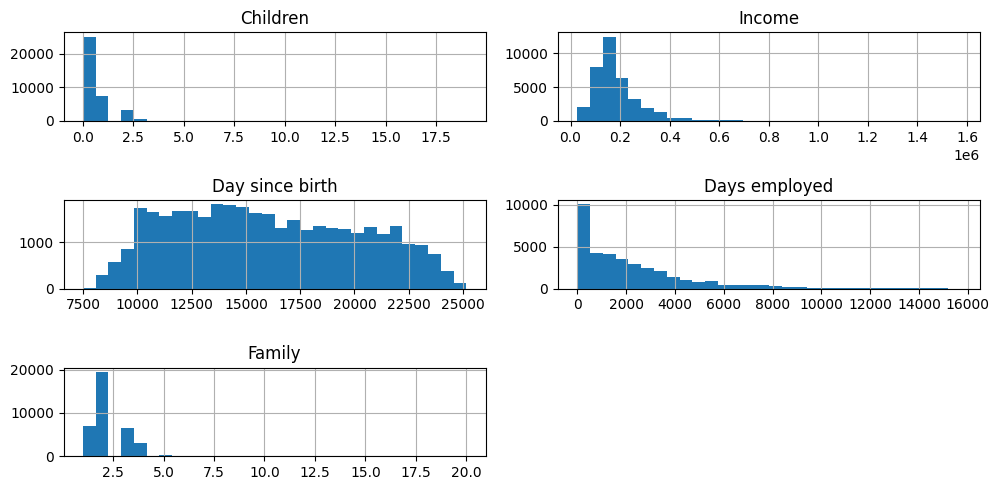

In [70]:
# Histogram with numerical features
merged_df.drop(['Work phone', 'Phone', 'Email'], axis = 1).hist(bins=30, figsize=(10, 5))
plt.tight_layout()

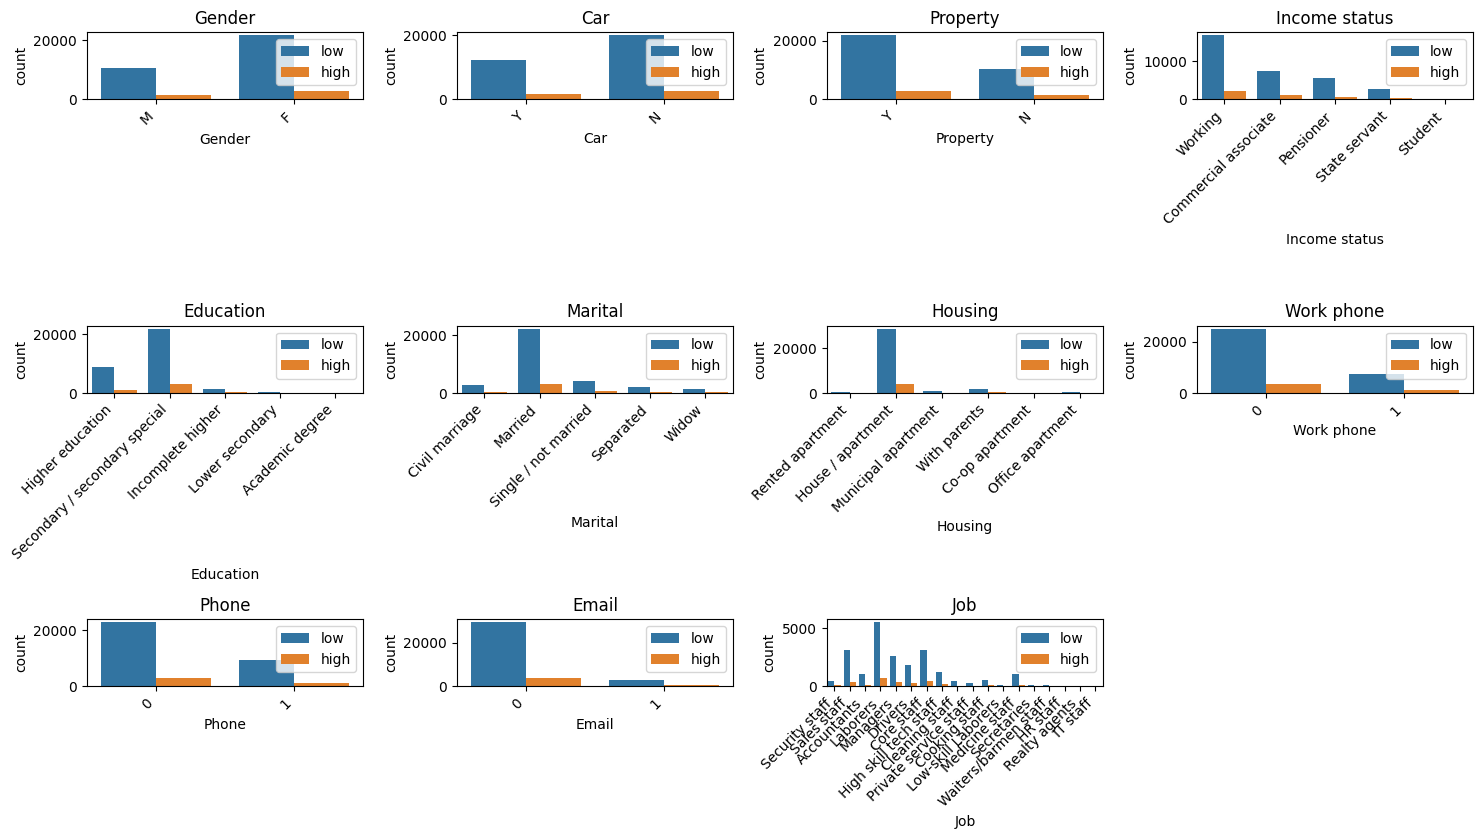

In [71]:
# Countplot with categorical features
features = ['Gender', 'Car', 'Property', 'Income status', 'Education', 'Marital', 'Housing', 'Work phone', 'Phone', 'Email', 'Job']
plt.figure(figsize=(15, 10))

for feature in features:
    plt.subplot(4, 4, features.index(feature) + 1)
    sns.countplot(data=merged_df, x=feature, hue = 'Bad debt chance', hue_order=['low', 'high'])
    plt.xticks(rotation=45, ha='right')
    plt.title(feature)
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

### **Correlation Heatmap with Numerical Features**

Text(0.5, 1.0, 'Correlation Heatmap')

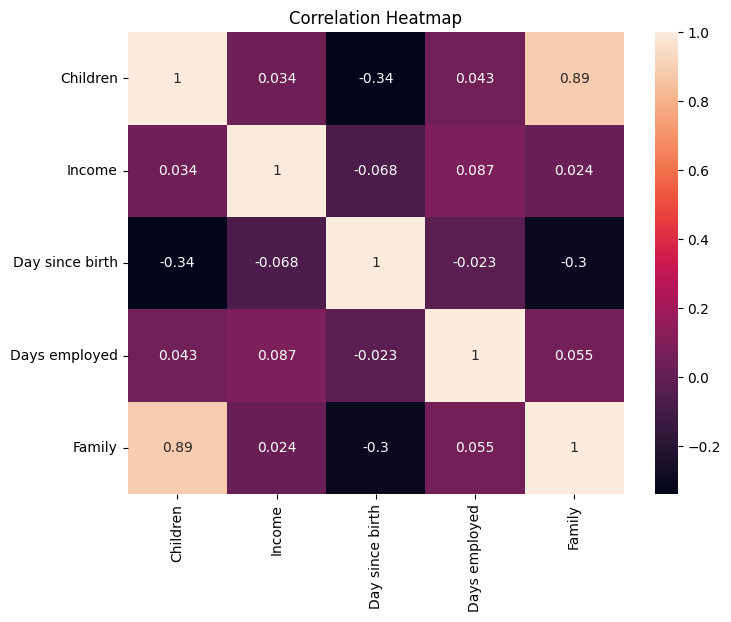

In [72]:
plt.figure(figsize = (8, 6))
sns.heatmap(merged_df.select_dtypes(include =['float64', 'int64']).drop(['Email', 'Phone', 'Work phone'], axis = 1).corr(), annot = True)
plt.title('Correlation Heatmap')

<br>As observed, there's a high correlation between children and family, which aligns with our expectations. It might be beneficial to eliminate one of these columns during the data preprocessing stage. <br><br>

### **Pairplot on Numerical Features**

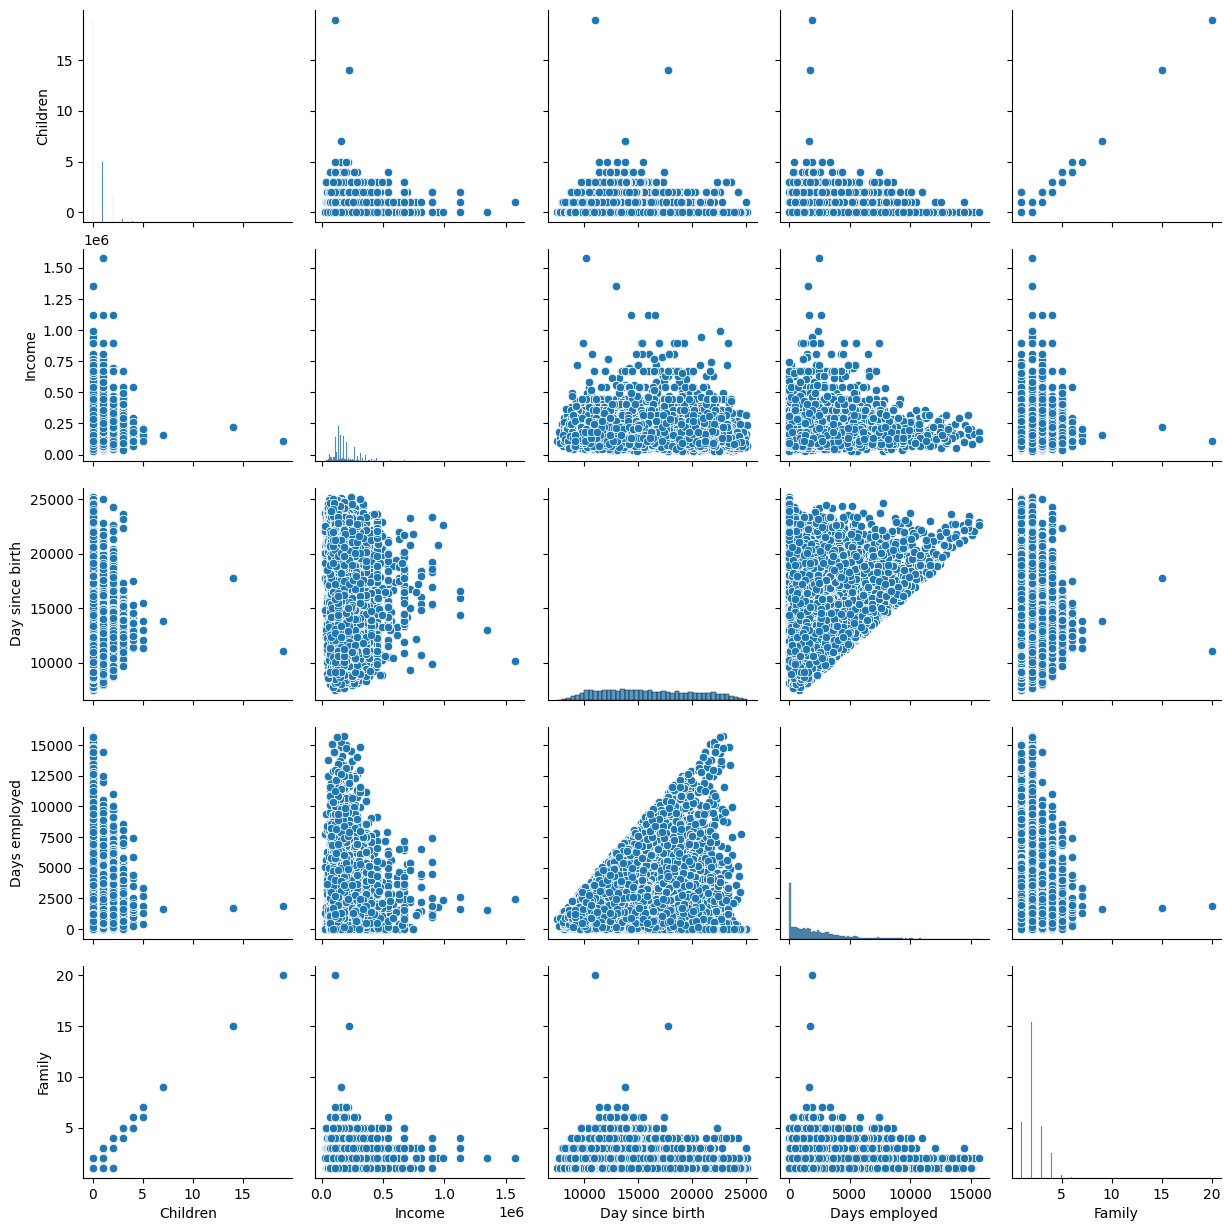

In [73]:
sns.pairplot(merged_df.select_dtypes(include =['float64', 'int64']).drop(['Email', 'Phone', 'Work phone'], axis = 1))

### **Data Preprocessing**

* Credit status is heavily influenced by income, we could use a stratified sample of income as train and test class to ensure the distribution of income class remain consistent.

In [74]:
# Engineering income category for stratified sample
def cat(x):
    if x <= 100000:
        return "low"
    elif x <= 300000:
        return 'medium'
    else:
        return 'high'

merged_df['Income_cat'] = merged_df['Income'].apply(cat)
merged_df['Income_cat'].value_counts()

Income_cat
medium    27542
low        5086
high       3829
Name: count, dtype: int64

### **Feature Selection**

In [75]:
# Defining stratified train and test set
from sklearn.model_selection import train_test_split

X = merged_df.drop(['Family', 'Bad debt chance'], axis = 1)
y = merged_df['Bad debt chance']

### **Train-Test Splitting**

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=X['Income_cat'])

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25519 entries, 34239 to 24918
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           25519 non-null  object 
 1   Car              25519 non-null  object 
 2   Property         25519 non-null  object 
 3   Children         25519 non-null  int64  
 4   Income           25519 non-null  float64
 5   Income status    25519 non-null  object 
 6   Education        25519 non-null  object 
 7   Marital          25519 non-null  object 
 8   Housing          25519 non-null  object 
 9   Day since birth  25519 non-null  int64  
 10  Days employed    25519 non-null  int64  
 11  Work phone       25519 non-null  int64  
 12  Phone            25519 non-null  int64  
 13  Email            25519 non-null  int64  
 14  Job              17550 non-null  object 
 15  Income_cat       25519 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.3+ MB


### **Creating a Data Pipeline for Classification: Preprocessing Numerical and Categorical Features**

In [78]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

cat_attribs = X_train.drop(['Children', 'Income', 'Day since birth', 'Days employed', 'Income_cat'], axis = 1).columns
num_attribs = X_train.iloc[:,[3, 4, 9, 10]].columns

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('one_hot_encoder', OneHotEncoder())
])

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

full_pipeline = FeatureUnion(transformer_list=[
    ('cat_pipeline', cat_pipeline),
    ('num_pipeline', num_pipeline),
])

In [79]:
# Transform the training and testing data sets
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.fit_transform(X_test)

## **Implementing Logistic Regression**

In [80]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(solver = 'liblinear', C=1e9, class_weight = {'low':2,'high':8},random_state = 0)
model.fit(X_train_prepared, y_train)

LogisticRegression(C=1000000000.0, class_weight={'high': 8, 'low': 2},
                   random_state=0, solver='liblinear')

In [81]:
y_pred = model.predict(X_train_prepared)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

        high       0.25      0.01      0.02      2981
         low       0.88      1.00      0.94     22538

    accuracy                           0.88     25519
   macro avg       0.57      0.50      0.48     25519
weighted avg       0.81      0.88      0.83     25519



* While logistic regression achieves good accuracy overall, it struggles to effectively classify these high-risk clients, with a recall of only 0.01.
* And so, we need to improve the value of Recall.

### **Undersampling to Balance the Data**

* Undersampling is a method in machine learning where we reduce the number of examples in the larger group to make it more equal with the smaller group. This helps the model learn better from both types of examples. For instance, in classifying clients with a high chance of bad debt, we might reduce the number of clients with a low chance of bad debt so that the model learns equally from both types of clients.

In [82]:
# UnderSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X_train_prepared, y_train)

In [83]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(solver = 'liblinear', random_state = 0)
model.fit(X_res, y_res)
y_pred = model.predict(X_train_prepared)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

        high       0.13      0.50      0.21      2981
         low       0.90      0.57      0.70     22538

    accuracy                           0.56     25519
   macro avg       0.52      0.54      0.46     25519
weighted avg       0.81      0.56      0.64     25519



Now that we've improved the recall, let's explore a few more Machine Learning algorithms before further optimization.

## **Implementing Random Forest**

In [84]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_res, y_res)

RandomForestClassifier(random_state=0)

In [85]:
y_pred = rf.predict(X_train_prepared)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

        high       0.28      0.93      0.43      2981
         low       0.99      0.68      0.81     22538

    accuracy                           0.71     25519
   macro avg       0.63      0.80      0.62     25519
weighted avg       0.90      0.71      0.76     25519



## **Implementing KNN**

In [86]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_res, y_res)

y_pred = knn_model.predict(X_train_prepared)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

        high       0.18      1.00      0.30      2981
         low       1.00      0.38      0.56     22538

    accuracy                           0.46     25519
   macro avg       0.59      0.69      0.43     25519
weighted avg       0.90      0.46      0.53     25519



## **Comaprison:**

Here, the recall scores of all the algorithms:

1. Logistic Regression: Recall for the "high" class: 0.01

2. Logistic Regression with Undersampling: Recall for the "high" class: 0.53

3. Random Forest: Recall for the "high" class: 0.93

4. K-Neighbors: Recall for the "high" class: 1.00

* The recall scores vary significantly across the models. In this context, where correctly identifying high-risk clients is the priority, models with higher recall for the "high" class are preferred.
* Among the models listed, K-Neighbors has the highest recall for the "high" class, making it the better choice for this problem.

## **Conclusion:**

* Despite the K-Nearest Neighbors classifier having a lower overall accuracy compared to random forests, it achieves a perfect score for the recall of clients with a high chance of bad debt.
* But given that this is the crucial metric for our use case, so we should prioritize it.
* Moreover, there are methods available to enhance the accuracy of the algorithm.